In [2]:
import numpy as np
import options.options as option
import utils.util as util
from data.util import bgr2ycbcr
import data.util as data_util
from data import create_dataset, create_dataloader
from models import create_model
import yaml
import os
import torch

/home/yuang/anaconda3/envs/moe_sr/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parser_dir = './options/test_farm/test_IRN_x4.yml'
with open(parser_dir,'r') as f:
    opt = yaml.load(f.read(),Loader=yaml.FullLoader)
opt = option.parse(parser_dir,is_train=False)
opt = option.dict_to_nonedict(opt)

export CUDA_VISIBLE_DEVICES=0


In [17]:
test_loaders = []
for phase, dataset_opt in sorted(opt['datasets'].items()):
    test_set = create_dataset(dataset_opt)
    test_loader = create_dataloader(test_set, dataset_opt)
    #logger.info('Number of test images in [{:s}]: {:d}'.format(dataset_opt['name'], len(test_set)))
    test_loaders.append(test_loader)

In [3]:
model = create_model(opt)

In [64]:
LQ_image_path = '/data0/yuang/Invertible-Image-Rescaling/results/IRN_x4/farm/Farm_image_2_LR.png'
img_LQ = data_util.read_img(None, LQ_image_path, None)
print(img_LQ.shape)
img_LQ = img_LQ[:, :, [2, 1, 0]]
img_LQ = torch.from_numpy(np.ascontiguousarray(np.transpose(img_LQ, (2, 0, 1)))).float()
img_LQ = torch.unsqueeze(img_LQ,0)
img_LQ = img_LQ.to(torch.device('cuda' if opt['gpu_ids'] is not None else 'cpu'))
print(img_LQ.shape,img_LQ.device)

(360, 640, 3)
torch.Size([1, 3, 360, 640]) cuda:0


In [65]:
HR_img = model.upscale(LR_img = img_LQ,scale=4,gaussian_scale=1)
HR_img = util.tensor2img(HR_img)
HR_img = HR_img[:, :, [2, 1, 0]]

In [66]:
HR_img.shape

(1440, 2560, 3)

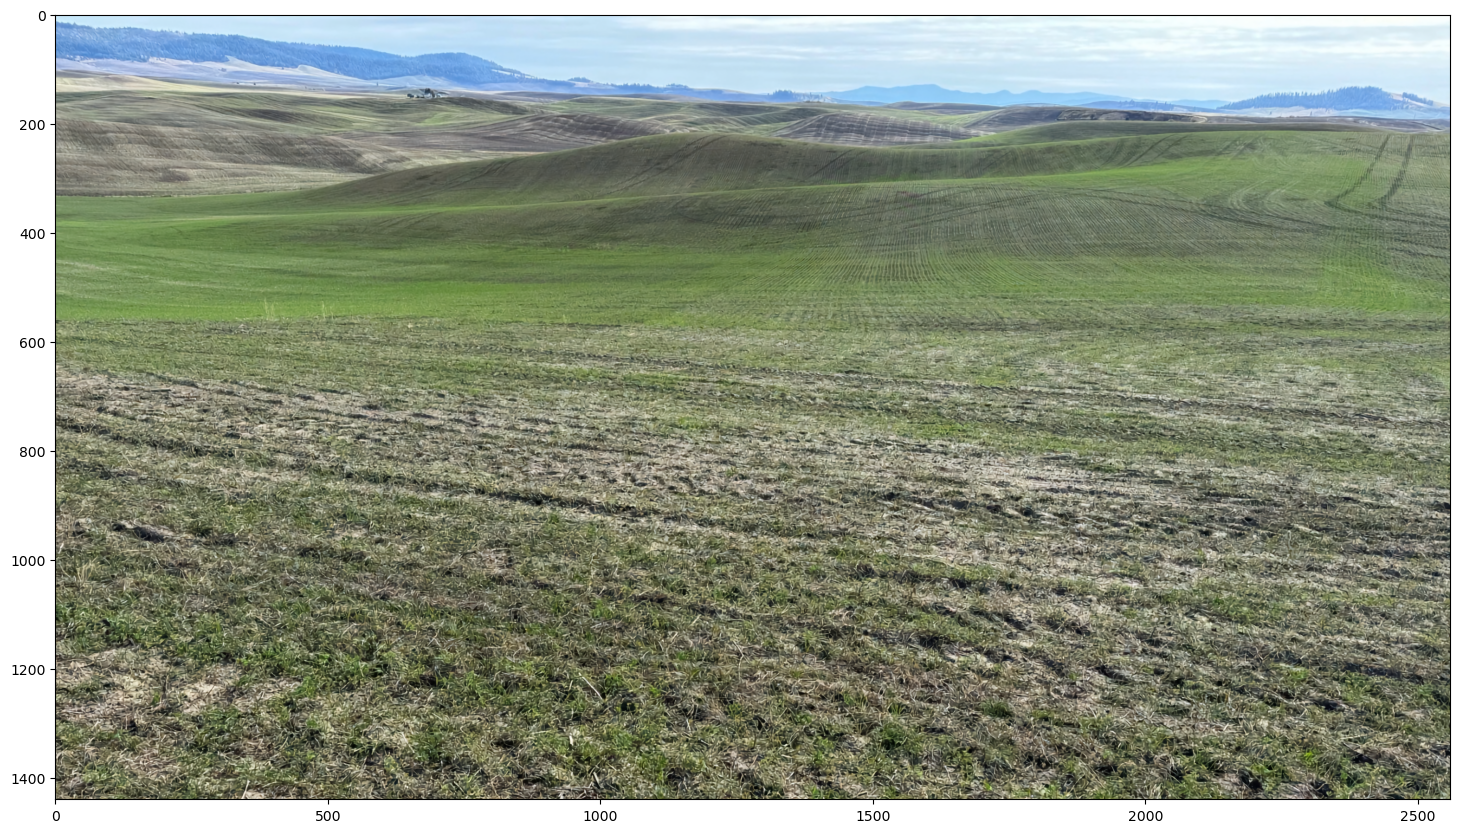

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,32))
plt.imshow(HR_img)


In [72]:
# save, but the orginal image should be BGR
HR_img = HR_img[:, :, [2, 1, 0]] # change to RGB
save_dir = "/data0/yuang/guided_sr/baselines/Invertible-Image-Rescaling/results_upscale"
filename = 'Farm_image_2_IRN_x4_upscale.png'
save_img_pth = os.path.join(save_dir, filename)
util.save_img(HR_img, save_img_pth)


In [5]:
LQ_image_path = '/data0/yuang/Invertible-Image-Rescaling/results/IRN_x4/farm/Farm_image_2_LR.jpg'
img_LQ = data_util.read_img(None, LQ_image_path, None)
print(img_LQ.shape)
img_LQ = img_LQ[:, :, [2, 1, 0]]
img_LQ = torch.from_numpy(np.ascontiguousarray(np.transpose(img_LQ, (2, 0, 1)))).float()
img_LQ = torch.unsqueeze(img_LQ,0)
img_LQ = img_LQ.to(torch.device('cuda' if opt['gpu_ids'] is not None else 'cpu'))
print(img_LQ.shape,img_LQ.device)
HR_img = model.upscale(LR_img = img_LQ,scale=4,gaussian_scale=1)
HR_img = util.tensor2img(HR_img)

save_dir = "/data0/yuang/guided_sr/baselines/Invertible-Image-Rescaling/results_upscale"
filename = 'Farm_image_2_IRN_x4_upscale_from_jpg.png'
save_img_pth = os.path.join(save_dir, filename)
util.save_img(HR_img, save_img_pth)

(360, 640, 3)
torch.Size([1, 3, 360, 640]) cuda:0


In [3]:
# test the difference between the two similar images
LQ_image1_path = '/data0/yuang/Invertible-Image-Rescaling/results/IRN_x4/desktop/desktop1_LR.png'
LQ_image2_path = '/data0/yuang/Invertible-Image-Rescaling/results/IRN_x4/desktop/desktop2_LR.png'
img_LQ_1 = data_util.read_img(None, LQ_image1_path, None)
img_LQ_2 = data_util.read_img(None, LQ_image2_path, None)

In [5]:
img_delta = img_LQ_1 - img_LQ_2


In [9]:
np.max(img_delta),np.min(img_delta)

(0.99215686, -1.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


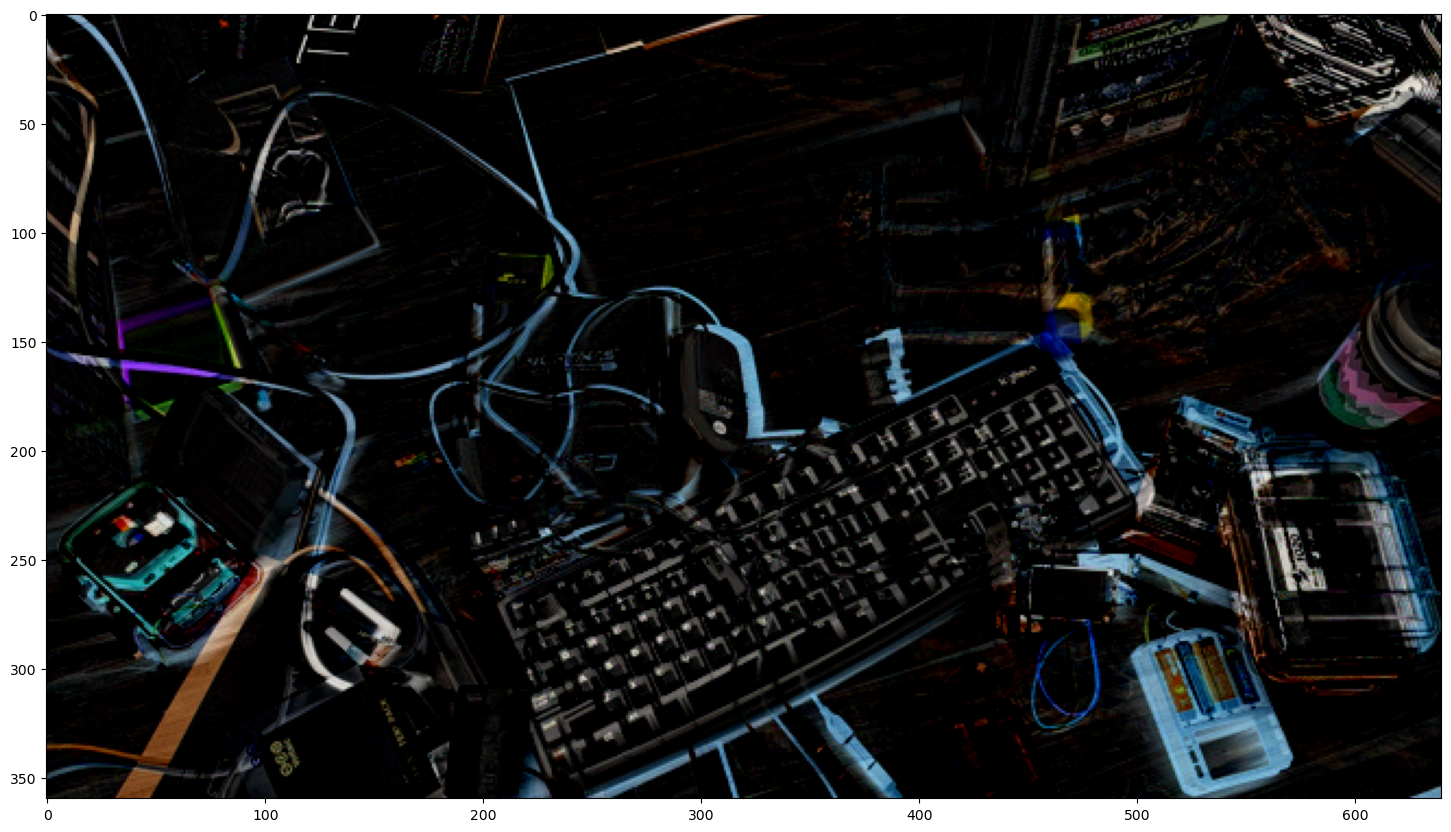

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,32))
plt.imshow(img_delta)